# Prediction using pre-trained model

In [7]:
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# prebuild model with pre-trained weights on imagenet
model = VGG16(weights='imagenet' , include_top=True)

In [9]:
img_path = 'C:/Users/Shaurya/summer/keras/train.jpg'

In [10]:
from PIL import Image

In [11]:
# resize into VGG16 trained images' format
img = image.load_img(img_path, target_size=(224, 224))
im = image.img_to_array(img)
im = np.expand_dims(im, axis=0)
im = preprocess_input(im)

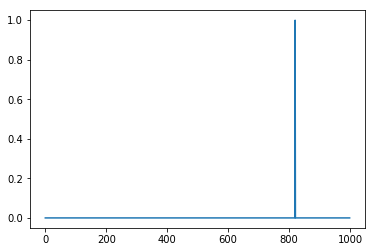

820


In [13]:
# predict
out = model.predict(im)
plt.plot(out.ravel())
plt.show()
print (np.argmax(out))

-----------------------

In [14]:
base_model = VGG16(weights='imagenet', include_top=True)
for i, layer in enumerate(base_model.layers):
     print (i, layer.name, layer.output_shape)

0 input_3 (None, 224, 224, 3)
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [17]:
model = Model(input=base_model.input, output=base_model.get_layer('block4_pool').output)

C:\Users\Shaurya\Anaconda2\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  """Entry point for launching an IPython kernel.


In [18]:
img_path = 'C:/Users/Shaurya/summer/keras/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [19]:
# get the features from this block
features = model.predict(x)

In [24]:
features.shape

(1, 14, 14, 512)

In [73]:
features[0][0:,0:,0].shape

(14, 14)

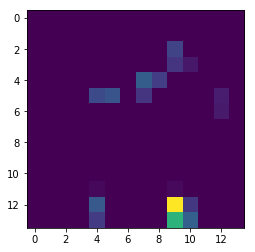

In [75]:
#plt.subplot(221)
plt.imshow(features[0][0:,0:,0])
plt.show()

In [77]:
im.shape

(1, 224, 224, 3)

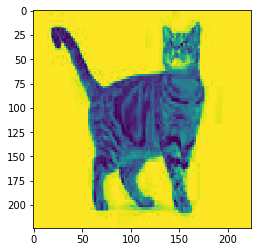

In [79]:
plt.imshow(x[0][0:,0:,0])
plt.show()

-------------------------------